## Çoklu Lineer Regrasyon Nedir?

**Multiple Lineer Regression**

Basit Lineer Regresyon:

$$ y = \beta_0 + \beta_1X + \epsilon $$

Sonuç değişkeninin (y) tek bir girdiye değil, birden çok girdiye bağlı olduğu durumlara denir.

**p > 1**

$$ y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p + \epsilon $$

Bu katsayı tahminleri yine RSS (OLS) denir.

In [101]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import os

In [102]:
# Excel dosyasının yolu
dosya_yolu = r"C:\Users\yusuf\OneDrive\Masaüstü\Laptop_Price_Prediction\cleaned_data_modified.xlsx"

# Dosya yolunun var olup olmadığını kontrol et
if os.path.exists(dosya_yolu):
    print("Dosya mevcut!")
    # Dosyayı oku
    df_ = pd.read_excel(dosya_yolu)
    df = df_.copy()
else:
    print("Dosya yolu yanlış veya dosya mevcut değil.")

Dosya mevcut!


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ekran_Boyutu         1200 non-null   float64
 1   Ekran_Karti          1200 non-null   float64
 2   GPU_Bellek_Tipi      1200 non-null   float64
 3   GPU_Gucu             1200 non-null   int64  
 4   GPU_Hafizasi         1200 non-null   int64  
 5   GPU_Tipi             1200 non-null   int64  
 6   Yenileme_Hizi        1200 non-null   int64  
 7   Max_CPU_Hizi_GHz     1200 non-null   float64
 8   Panel_Tipi           1200 non-null   float64
 9   RAM                  1200 non-null   int64  
 10  RAM_Tipi             1200 non-null   float64
 11  Renk                 1200 non-null   float64
 12  SSD_Kapasitesi       1200 non-null   int64  
 13  CPU_Cekirdek_Sayisi  1200 non-null   int64  
 14  Isletim_Sistemi      1200 non-null   float64
 15  Islemci              1200 non-null   f

In [104]:
list(df.columns)

['Ekran_Boyutu',
 'Ekran_Karti',
 'GPU_Bellek_Tipi',
 'GPU_Gucu',
 'GPU_Hafizasi',
 'GPU_Tipi',
 'Yenileme_Hizi',
 'Max_CPU_Hizi_GHz',
 'Panel_Tipi',
 'RAM',
 'RAM_Tipi',
 'Renk',
 'SSD_Kapasitesi',
 'CPU_Cekirdek_Sayisi',
 'Isletim_Sistemi',
 'Islemci',
 'Fiyat']

In [105]:
X = df[['Ekran_Boyutu',
 'Ekran_Karti',
 'GPU_Bellek_Tipi',
 'GPU_Gucu',
 'GPU_Hafizasi',
 'GPU_Tipi',
 'Yenileme_Hizi',
 'Max_CPU_Hizi_GHz',
 'Panel_Tipi',
 'RAM',
 'RAM_Tipi',
 'Renk',
 'SSD_Kapasitesi',
 'CPU_Cekirdek_Sayisi',
 'Isletim_Sistemi',
 'Islemci']]

In [106]:
X

,Ekran_Boyutu,Ekran_Karti,GPU_Bellek_Tipi,GPU_Gucu,GPU_Hafizasi,GPU_Tipi,Yenileme_Hizi,Max_CPU_Hizi_GHz,Panel_Tipi,RAM,RAM_Tipi,Renk,SSD_Kapasitesi,CPU_Cekirdek_Sayisi,Isletim_Sistemi,Islemci
0,0.575,0.782609,0.75,106,8,1,144,4.7,0.250,8,0.25,0.782609,512,8,0.0,0.478261
1,0.575,0.565217,0.75,106,6,1,120,4.7,0.875,16,0.25,0.826087,512,24,0.0,0.782609
2,0.575,0.478261,0.75,55,4,1,144,4.7,0.250,16,0.00,0.826087,500,14,0.0,0.739130
3,0.575,0.739130,0.75,105,6,1,144,4.4,0.125,16,0.25,0.130435,512,8,0.0,0.478261
4,0.575,0.565217,0.75,106,4,1,144,4.4,0.250,16,0.00,0.826087,500,8,0.0,0.478261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1.000,0.782609,0.75,105,8,1,144,4.9,0.250,96,0.25,0.826087,256,16,1.0,0.768116
1196,0.700,0.608696,0.75,106,4,1,165,4.7,0.250,16,0.25,0.130435,512,14,0.0,0.739130
1197,0.575,0.782609,0.75,106,8,1,165,4.7,0.250,48,0.25,0.826087,4096,14,1.0,0.739130
1198,0.575,0.782609,0.75,106,8,1,165,4.7,0.250,32,0.25,0.826087,4096,14,1.0,0.739130


In [107]:
y = df["Fiyat"]

In [108]:
y

0        34.999
1        34.899
2        28.089
3        34.999
4        26.499
         ...   
1195    121.480
1196     58.099
1197     58.099
1198     58.099
1199     58.099
Name: Fiyat, Length: 1200, dtype: float64

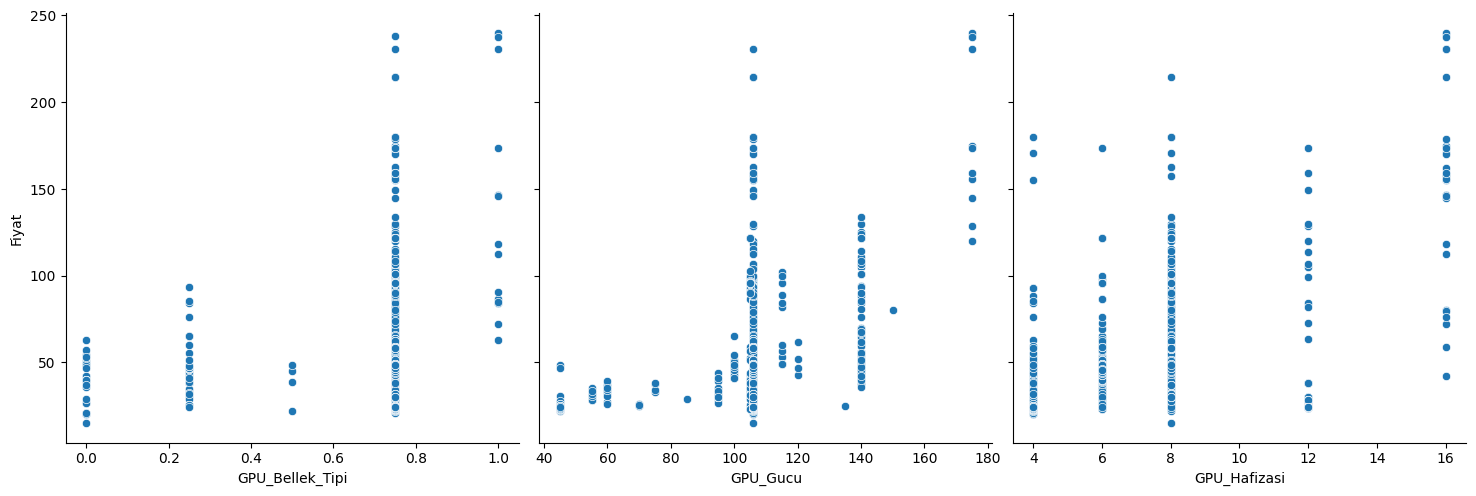

In [109]:
sns.pairplot(df,x_vars=df.columns[2:5],y_vars=df.columns[16],height=5)

**Modeli Oluştur**

In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
lr = LinearRegression()

In [112]:
print("X'in boyutu:", X.shape)
print("y'in boyutu:", y.shape)

X'in boyutu: (1200, 16)
y'in boyutu: (1200,)


In [113]:
y = y.values.reshape(-1,1)

In [114]:
print("y'nin yeni boyutu:", y.shape)

y'nin yeni boyutu: (1200, 1)


In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [117]:
print("X_train şekli:",X_train.shape)
print("X_test şekli:",X_test.shape)
print("y_train şekli:",y_train.shape)
print("y_test şekli:",y_test.shape)

X_train şekli: (840, 16)
X_test şekli: (360, 16)
y_train şekli: (840, 1)
y_test şekli: (360, 1)


In [118]:
lr.fit(X_train, y_train)

LinearRegression()

In [119]:
# intercept -> beta 0
print("intercept : ", lr.intercept_)

intercept :  [24.44334764]


In [120]:
# slope = coefficient -> beta 1, beta 2, beta 3, ........., beta 15
print("slope (coefficient) eğim : ", lr.coef_)

slope (coefficient) eğim :  [[ 6.45791909e+00  1.87841789e+01  2.03584661e+01  4.05330878e-01
   1.45144804e+00 -1.56947794e-01 -4.62723545e-02 -1.72810316e+01
   1.69402364e+01  3.64861233e-01  3.88617178e+01 -7.21001238e+00
   7.01613955e-03 -6.52569089e-01  3.90020652e+00  2.07564505e+01]]


In [121]:
katsayilar = pd.DataFrame(lr.coef_, columns = ['Ekran_Boyutu',
 'Ekran_Karti',
 'GPU_Bellek_Tipi',
 'GPU_Gucu',
 'GPU_Hafizasi',
 'GPU_Tipi',
 'Yenileme_Hizi',
 'Max_CPU_Hizi_GHz',
 'Panel_Tipi',
 'RAM',
 'RAM_Tipi',
 'Renk',
 'SSD_Kapasitesi',
 'CPU_Cekirdek_Sayisi',
 'Isletim_Sistemi',
 'Islemci'])
katsayilar

,Ekran_Boyutu,Ekran_Karti,GPU_Bellek_Tipi,GPU_Gucu,GPU_Hafizasi,GPU_Tipi,Yenileme_Hizi,Max_CPU_Hizi_GHz,Panel_Tipi,RAM,RAM_Tipi,Renk,SSD_Kapasitesi,CPU_Cekirdek_Sayisi,Isletim_Sistemi,Islemci
0,6.457919,18.784179,20.358466,0.405331,1.451448,-0.156948,-0.046272,-17.281032,16.940236,0.364861,38.861718,-7.210012,0.007016,-0.652569,3.900207,20.75645


In [122]:
y_pred = lr.predict(X_test)

In [123]:
y_pred

array([[ 89.44605724],
       [ 55.55249833],
       [ 42.762438  ],
       [ 44.48249436],
       [ 41.82777346],
       [ 52.91225736],
       [ 73.32388556],
       [ 52.45175985],
       [ 40.00024256],
       [ 38.48918533],
       [129.90490768],
       [ 44.18727315],
       [  6.15091047],
       [ 48.55155333],
       [ 59.74510898],
       [ 38.03695127],
       [ 52.64123569],
       [ 57.65641797],
       [ 44.40138658],
       [ 45.70250464],
       [ 44.02481678],
       [ 58.48963854],
       [ 63.65772675],
       [ 49.82650006],
       [ 50.09255287],
       [ 75.78256327],
       [ 85.50151129],
       [ 59.58766301],
       [ 28.89866511],
       [ 71.27296212],
       [ 39.03375685],
       [ 47.73673826],
       [ 44.17365883],
       [ 59.21209478],
       [ 47.76031423],
       [ 61.24868141],
       [ 39.81772661],
       [ 87.64726692],
       [ 27.9958918 ],
       [ 35.69766653],
       [ 35.39891818],
       [ 48.32646877],
       [ 61.13636849],
       [ 53

In [124]:
y_pred.shape

(360, 1)

In [125]:
y_test.shape

(360, 1)

In [126]:
y_test[0:10]

array([[101.207],
       [ 36.999],
       [ 54.999],
       [ 33.899],
       [ 30.299],
       [ 45.249],
       [100.999],
       [ 38.094],
       [ 30.999],
       [ 37.   ]])

In [127]:
y_pred[0:10]

array([[89.44605724],
       [55.55249833],
       [42.762438  ],
       [44.48249436],
       [41.82777346],
       [52.91225736],
       [73.32388556],
       [52.45175985],
       [40.00024256],
       [38.48918533]])

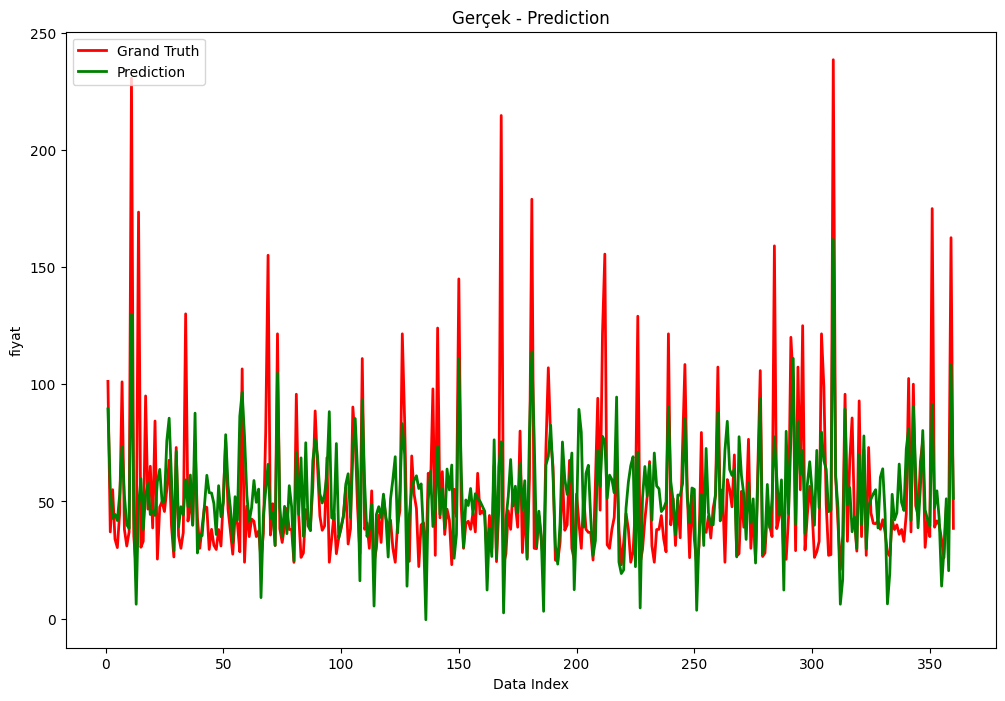

In [128]:
indexler = range(1,361)

fig, ax = plt.subplots(figsize = (12,8))
ax.plot(indexler, y_test, label = "Grand Truth", color = "red", linewidth = 2)


ax.plot(indexler, y_pred, label = "Prediction", color = "green", linewidth = 2)



plt.title("Gerçek - Prediction")
plt.xlabel("Data Index")
plt.ylabel("fiyat")
plt.legend(loc="upper left")
plt.show()

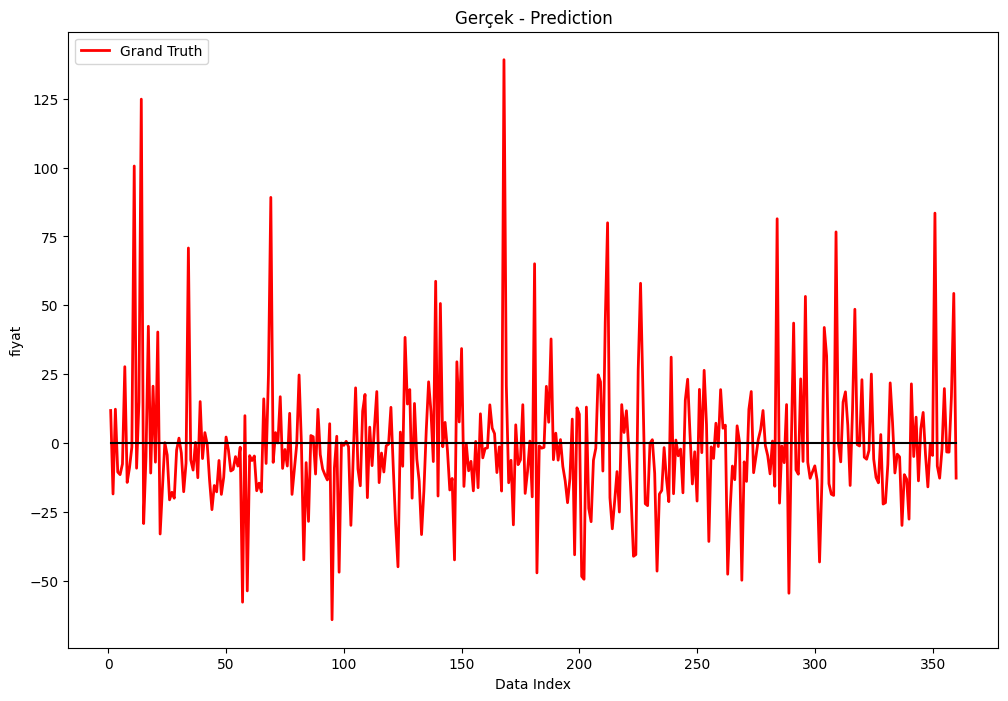

In [129]:
import numpy as np
# Hatalar
indexler = range(1,361)
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(indexler, y_test - y_pred, label = "Grand Truth", color = "red", linewidth = 2)

ax.plot(indexler,np.zeros(360),color="black" )

plt.title("Gerçek - Prediction")
plt.xlabel("Data Index")
plt.ylabel("fiyat")
plt.legend(loc="upper left")
plt.show()

In [130]:
from sklearn.metrics import r2_score, mean_squared_error

In [131]:
from sklearn.impute import SimpleImputer


# Now calculate r2_score on the imputed data
rtwo = r2_score(y_test, y_pred)
print(f"R^2 score: {rtwo}")
print(f"R^2 score (%): {rtwo*100}")

R^2 score: 0.42629321079989146
R^2 score (%): 42.62932107998915


In [132]:
mse = mean_squared_error(y_test,y_pred)

In [133]:
print(mse)

618.193784246825


In [134]:
import math
rmse = math.sqrt(mse)

In [135]:
print(rmse)

24.863503056625486


In [136]:
import statsmodels.api as sm

In [137]:
X_train_ols = sm.add_constant(X_train)

In [138]:
X_train_ols

,const,Ekran_Boyutu,Ekran_Karti,GPU_Bellek_Tipi,GPU_Gucu,GPU_Hafizasi,GPU_Tipi,Yenileme_Hizi,Max_CPU_Hizi_GHz,Panel_Tipi,RAM,RAM_Tipi,Renk,SSD_Kapasitesi,CPU_Cekirdek_Sayisi,Isletim_Sistemi,Islemci
522,1.0,0.700,0.130435,0.75,106,8,1,165,4.5,0.25,32,0.25,0.913043,512,8,0.0,0.231884
213,1.0,0.700,0.782609,0.75,106,8,1,165,4.9,0.25,16,0.25,0.173913,512,14,0.0,0.782609
120,1.0,0.575,0.478261,0.75,135,4,1,144,4.4,0.75,16,0.25,0.826087,256,8,1.0,0.478261
917,1.0,1.000,0.869565,0.75,106,12,1,240,5.0,0.25,8,0.25,0.826087,512,24,0.0,0.898551
1067,1.0,0.575,0.739130,0.75,106,6,1,144,4.7,0.25,32,0.00,0.347826,512,12,1.0,0.536232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,1.0,0.575,0.739130,0.75,106,6,1,144,4.7,0.25,24,0.00,0.347826,256,12,1.0,0.536232
1095,1.0,1.000,0.913043,0.75,106,16,1,240,4.7,0.25,64,0.25,0.826087,2048,24,1.0,0.927536
1130,1.0,0.575,0.739130,0.75,106,6,1,144,4.7,0.25,48,0.00,0.347826,2048,12,1.0,0.536232
860,1.0,0.575,0.173913,0.75,106,8,0,144,5.0,0.25,12,0.00,0.304348,256,12,0.0,0.753623


In [139]:
sm_model = sm.OLS(y_train,X_train_ols)

In [140]:
sonuc = sm_model.fit()

In [141]:
print(sonuc.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     39.40
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           2.94e-90
Time:                        15:49:49   Log-Likelihood:                -3835.2
No. Observations:                 840   AIC:                             7704.
Df Residuals:                     823   BIC:                             7785.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  24.4433    

<Axes: >

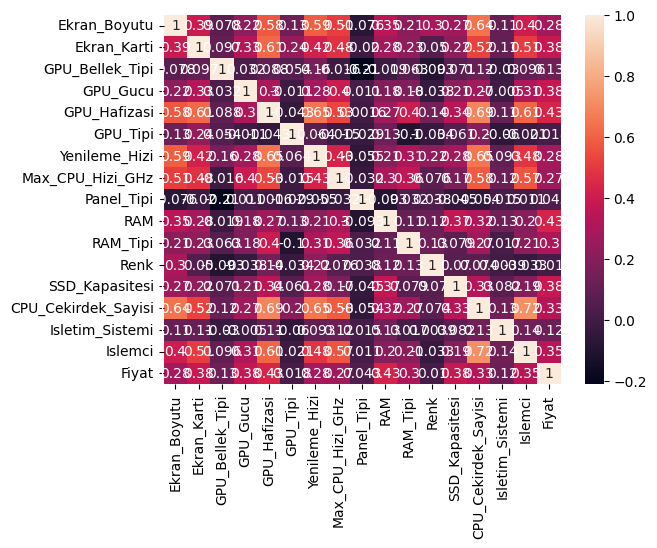

In [142]:
sns.heatmap(df.corr(), annot=True)

In [143]:
X_train

,Ekran_Boyutu,Ekran_Karti,GPU_Bellek_Tipi,GPU_Gucu,GPU_Hafizasi,GPU_Tipi,Yenileme_Hizi,Max_CPU_Hizi_GHz,Panel_Tipi,RAM,RAM_Tipi,Renk,SSD_Kapasitesi,CPU_Cekirdek_Sayisi,Isletim_Sistemi,Islemci
522,0.700,0.130435,0.75,106,8,1,165,4.5,0.25,32,0.25,0.913043,512,8,0.0,0.231884
213,0.700,0.782609,0.75,106,8,1,165,4.9,0.25,16,0.25,0.173913,512,14,0.0,0.782609
120,0.575,0.478261,0.75,135,4,1,144,4.4,0.75,16,0.25,0.826087,256,8,1.0,0.478261
917,1.000,0.869565,0.75,106,12,1,240,5.0,0.25,8,0.25,0.826087,512,24,0.0,0.898551
1067,0.575,0.739130,0.75,106,6,1,144,4.7,0.25,32,0.00,0.347826,512,12,1.0,0.536232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,0.575,0.739130,0.75,106,6,1,144,4.7,0.25,24,0.00,0.347826,256,12,1.0,0.536232
1095,1.000,0.913043,0.75,106,16,1,240,4.7,0.25,64,0.25,0.826087,2048,24,1.0,0.927536
1130,0.575,0.739130,0.75,106,6,1,144,4.7,0.25,48,0.00,0.347826,2048,12,1.0,0.536232
860,0.575,0.173913,0.75,106,8,0,144,5.0,0.25,12,0.00,0.304348,256,12,0.0,0.753623


In [144]:
X_train_yeni = X_train[['Ekran_Karti',
 'GPU_Bellek_Tipi',
 'GPU_Gucu',
 'GPU_Hafizasi',
 'Max_CPU_Hizi_GHz',
 'Panel_Tipi',
 'RAM',
 'RAM_Tipi',
 'Renk',
 'SSD_Kapasitesi',
 'CPU_Cekirdek_Sayisi',
 'Isletim_Sistemi',
 'Islemci']]

In [145]:
X_train_yeni.head()

,Ekran_Karti,GPU_Bellek_Tipi,GPU_Gucu,GPU_Hafizasi,Max_CPU_Hizi_GHz,Panel_Tipi,RAM,RAM_Tipi,Renk,SSD_Kapasitesi,CPU_Cekirdek_Sayisi,Isletim_Sistemi,Islemci
522,0.130435,0.75,106,8,4.5,0.25,32,0.25,0.913043,512,8,0.0,0.231884
213,0.782609,0.75,106,8,4.9,0.25,16,0.25,0.173913,512,14,0.0,0.782609
120,0.478261,0.75,135,4,4.4,0.75,16,0.25,0.826087,256,8,1.0,0.478261
917,0.869565,0.75,106,12,5.0,0.25,8,0.25,0.826087,512,24,0.0,0.898551
1067,0.739130,0.75,106,6,4.7,0.25,32,0.00,0.347826,512,12,1.0,0.536232


In [146]:
X_test_yeni = X_test[['Ekran_Karti',
 'GPU_Bellek_Tipi',
 'GPU_Gucu',
 'GPU_Hafizasi',
 'Max_CPU_Hizi_GHz',
 'Panel_Tipi',
 'RAM',
 'RAM_Tipi',
 'Renk',
 'SSD_Kapasitesi',
 'CPU_Cekirdek_Sayisi',
 'Isletim_Sistemi',
 'Islemci']]

In [147]:
X_test_yeni.head()

,Ekran_Karti,GPU_Bellek_Tipi,GPU_Gucu,GPU_Hafizasi,Max_CPU_Hizi_GHz,Panel_Tipi,RAM,RAM_Tipi,Renk,SSD_Kapasitesi,CPU_Cekirdek_Sayisi,Isletim_Sistemi,Islemci
1178,0.782609,0.75,140,8,5.0,0.25,96,0.25,0.826087,1024,12,0.0,0.840580
865,0.478261,0.75,106,4,4.2,0.25,32,0.00,0.826087,4096,8,0.0,0.014493
101,0.478261,0.75,106,4,4.7,0.25,16,0.25,0.826087,1024,8,1.0,0.478261
439,0.565217,0.75,106,4,4.7,0.75,16,0.00,0.130435,512,10,0.0,0.724638
58,0.739130,0.75,106,6,4.7,0.75,16,0.00,0.826087,512,8,0.0,0.478261


In [148]:
lr.fit(X_train_yeni, y_train)

LinearRegression()

In [149]:
y_pred_yeni = lr.predict(X_test_yeni)

In [150]:
y_pred_yeni

array([[ 93.27467409],
       [ 55.52171093],
       [ 42.92648183],
       [ 44.90502912],
       [ 42.18932582],
       [ 53.54022629],
       [ 73.92141157],
       [ 53.1248096 ],
       [ 40.72135729],
       [ 38.69025291],
       [124.63031575],
       [ 43.98392646],
       [  7.18154668],
       [ 49.30852765],
       [ 58.30646646],
       [ 35.20569926],
       [ 53.84437715],
       [ 58.07520747],
       [ 44.78365939],
       [ 45.81316779],
       [ 45.30090795],
       [ 56.84628223],
       [ 63.35795974],
       [ 48.79262653],
       [ 49.11013056],
       [ 75.7742721 ],
       [ 87.05067721],
       [ 60.15490906],
       [ 30.08749601],
       [ 71.75314382],
       [ 38.79748505],
       [ 48.36748467],
       [ 43.02544766],
       [ 61.43802462],
       [ 46.66790622],
       [ 61.62830484],
       [ 39.93910561],
       [ 88.36690781],
       [ 29.08355803],
       [ 35.6020724 ],
       [ 35.65556881],
       [ 47.8474085 ],
       [ 60.74671722],
       [ 53

In [151]:
X_train_yeni_ols = sm.add_constant(X_train_yeni)

In [152]:
sm_model = sm.OLS(y_train,X_train_yeni_ols)

In [153]:
sonuc = sm_model.fit()

In [154]:
print(sonuc.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     48.31
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           3.29e-92
Time:                        15:49:50   Log-Likelihood:                -3836.5
No. Observations:                 840   AIC:                             7701.
Df Residuals:                     826   BIC:                             7767.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  17.1708    

In [155]:
y_test[0:10]

array([[101.207],
       [ 36.999],
       [ 54.999],
       [ 33.899],
       [ 30.299],
       [ 45.249],
       [100.999],
       [ 38.094],
       [ 30.999],
       [ 37.   ]])

In [156]:
y_pred_yeni[0:10]

array([[93.27467409],
       [55.52171093],
       [42.92648183],
       [44.90502912],
       [42.18932582],
       [53.54022629],
       [73.92141157],
       [53.1248096 ],
       [40.72135729],
       [38.69025291]])

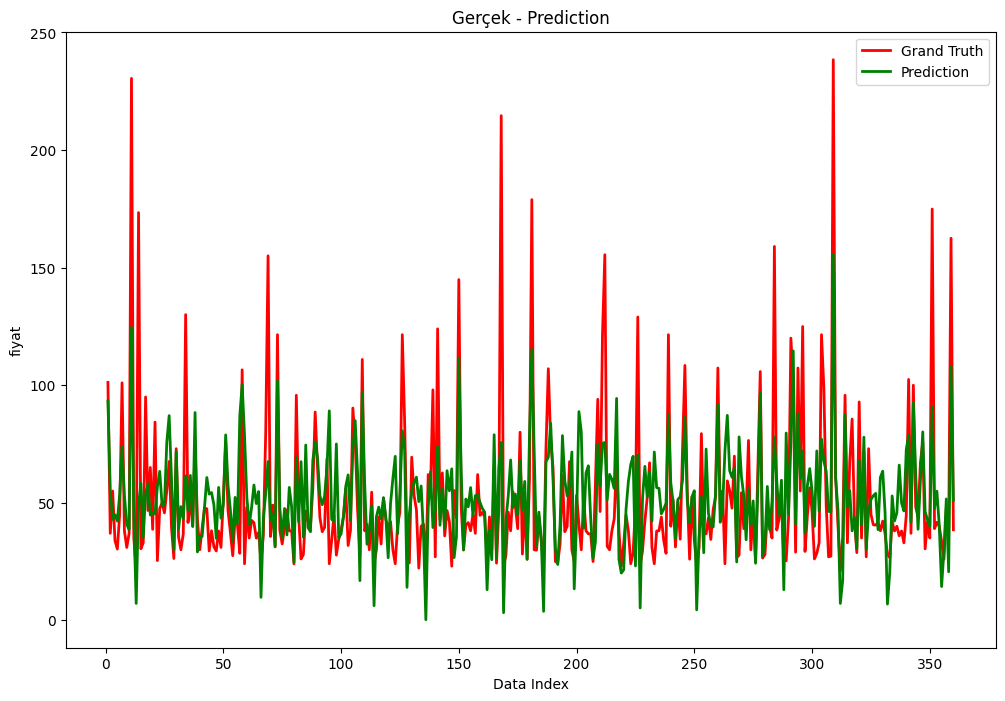

In [157]:
indexler = range(1,361)

fig, ax = plt.subplots(figsize = (12,8))
ax.plot(indexler, y_test, label = "Grand Truth", color = "red", linewidth = 2)


ax.plot(indexler, y_pred_yeni, label = "Prediction", color = "green", linewidth = 2)



plt.title("Gerçek - Prediction")
plt.xlabel("Data Index")
plt.ylabel("fiyat")
plt.legend(loc="upper right")
plt.show()

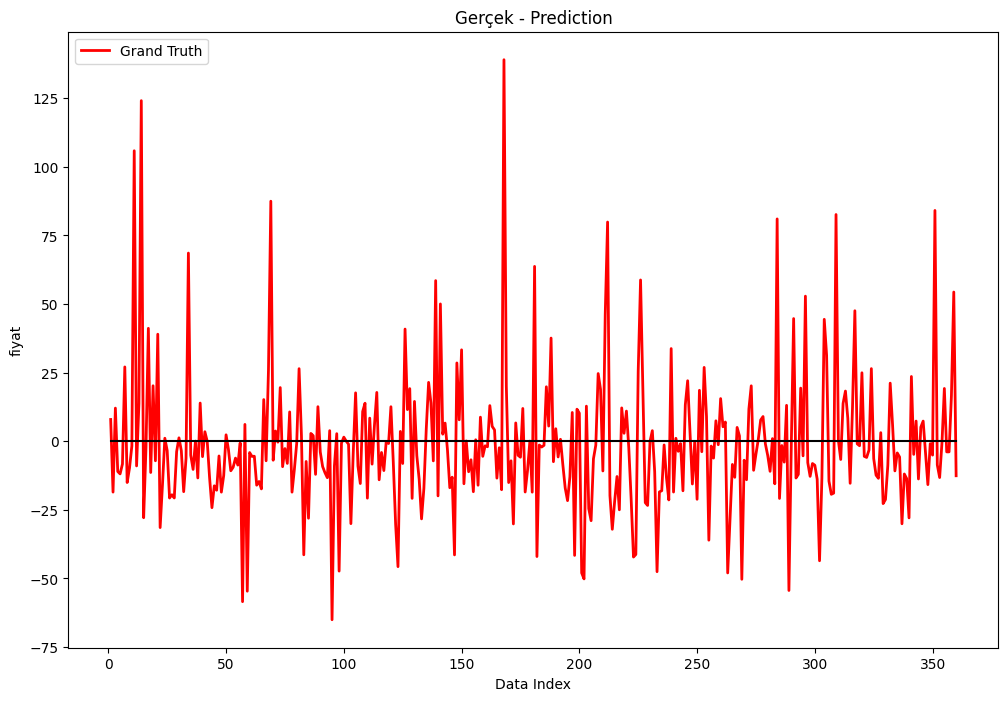

In [158]:
import numpy as np
# Hatalar
indexler = range(1,361)
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(indexler, y_test - y_pred_yeni, label = "Grand Truth", color = "red", linewidth = 2)

ax.plot(indexler,np.zeros(360),color="black" )

plt.title("Gerçek - Prediction")
plt.xlabel("Data Index")
plt.ylabel("fiyat")
plt.legend(loc="upper left")
plt.show()

In [159]:
# intercept -> beta 0
print("intercept : ", lr.intercept_)

intercept :  [17.1707829]


In [160]:
# slope = coefficient -> beta 1, beta 2, beta 3, ........., beta 15
print("slope (coefficient) eğim : ", lr.coef_)

slope (coefficient) eğim :  [[ 1.91044325e+01  1.96594335e+01  3.96373139e-01  1.31844111e+00
  -1.57512191e+01  1.69461267e+01  3.72597031e-01  3.78459490e+01
  -7.34719500e+00  6.93964330e-03 -6.83728256e-01  3.81628195e+00
   2.00159253e+01]]


In [161]:
from sklearn.impute import SimpleImputer
import math

# Now calculate r2_score on the imputed data
rtwo = r2_score(y_test, y_pred)
print(f"R^2 score: {rtwo}")
print(f"R^2 score (%): {rtwo*100}")

mse = mean_squared_error(y_test,y_pred)
print("MSE DEĞERİ : ",mse)

rmse = math.sqrt(mse)

print("RMSE : ",rmse)

R^2 score: 0.42629321079989146
R^2 score (%): 42.62932107998915
MSE DEĞERİ :  618.193784246825
RMSE :  24.863503056625486
